<a href="https://colab.research.google.com/github/Edinsson-G/unet/blob/main/Copia_de_Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras as K

def mired(size=(512,512,1)):
  input = K.layers.Input(size)
  salida1 = K.layers.Conv2D(3,3,activation="relu", padding="same")(input) # 512,512,3
  salida11 = K.layers.MaxPooling2D(2,strides=2)(salida1)#256,256,3
  salida2 = K.layers.Conv2D(6,3,activation="relu", padding="same")(salida11)#256,256,6
  salida21 = K.layers.MaxPooling2D(2,strides=2)(salida2)#128,128,6
  salida3 = K.layers.Conv2D(18,3,activation="relu", padding="same")(salida21)#128,128,18
  salida31 = K.layers.MaxPooling2D(2,strides=2)(salida3)#64,64,18
  salida4 = K.layers.Conv2D(36,3,activation="relu", padding="same")(salida31)# 64,64,36
  salida41 = K.layers.Conv2DTranspose(18,3,strides=(2,2),padding="SAME",activation="relu")(salida4)#128,128,18
  salida42 = K.layers.concatenate([salida41,salida3])#128,128,36
  salida5 = K.layers.Conv2D(18,3,activation="relu", padding="same")(salida42)#256,256,6
  salida6 = K.layers.Conv2D(6,3,activation="relu", padding="same")(salida5)
  salida7 = K.layers.Conv2D(3,3,activation="sigmoid", padding="same")(salida6)
  model = K.Model(input,salida7)
  return model

modelo = mired()

print(modelo.summary())
  

In [ ]:
loss = K.losses.MSE
opti = K.optimizers.Adam(learning_rate=0.001)
modelo.compile(loss=loss, optimizer=opti)

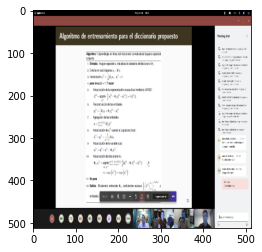

In [ ]:
import cv2
from matplotlib import pyplot as plt
a = cv2.imread('miimg.png')
a = cv2.resize(a,(512,512))
plt.imshow(a)
plt.show()

In [ ]:
import numpy as np
a = a.astype(np.float32)
a = a / 255

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


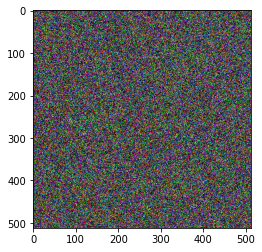

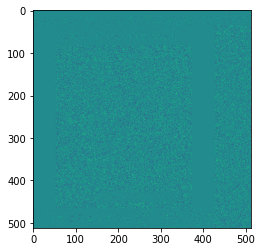

In [ ]:
H = np.random.randn(512,512,3)

plt.imshow(H)
plt.show()

Y = np.sum(H*a,axis=-1)

plt.imshow(Y)
plt.show()

In [ ]:
a1 = a[np.newaxis,:,:,:]
Y1 = Y[np.newaxis,:,:,np.newaxis]

it=200

for i in range(it):
  loss1 = modelo.train_on_batch(Y1,a1)
  print(loss1)

0.1929052621126175
0.18846020102500916
0.18278490006923676
0.17551445960998535
0.16623876988887787
0.15480458736419678
0.1415979266166687
0.12775710225105286
0.11526456475257874
0.10626987367868423
0.10205104947090149
0.10213275253772736
0.10403835773468018
0.1054687425494194
0.1057986170053482
0.10556025803089142
0.10547130554914474
0.10482830554246902
0.1029495820403099
0.10051959753036499
0.09824380278587341
0.09640425443649292
0.09507358819246292
0.09421376883983612
0.09367727488279343
0.09328412264585495
0.09296011179685593
0.09273366630077362
0.09256330132484436
0.0922584980726242
0.09168721735477448
0.09091808646917343
0.09013429284095764
0.08946092426776886
0.08892370760440826
0.08846811950206757
0.08800801634788513
0.08747069537639618
0.08682946115732193
0.08612103760242462
0.08543166518211365
0.08482763171195984
0.08425083756446838
0.08357700705528259
0.08279359340667725
0.08199188113212585
0.08122706413269043
0.08045763522386551
0.07959714531898499
0.07857828587293625
0.0774

In [ ]:
a1 = modelo.predict(Y1)

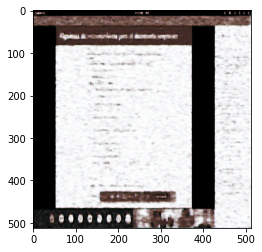

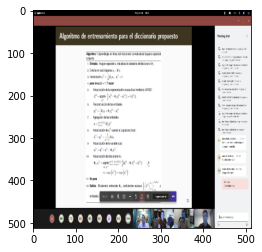

In [ ]:
a1 = a1[0,:,:,:]
plt.imshow(a1)
plt.show()
plt.imshow(a)
plt.show()